In [14]:
import leaderbot as lb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = lb.data.load()
model = lb.models.DavidsonScaled(data)
model.train()

In [6]:
p_exp = model.infer()

In [7]:
y = model.y
y_sum = y.sum(axis=1, keepdims=True)

p_obs = y / y_sum

In [19]:
def _get_g(model):
    p_exp = model.infer()
    
    y = model.y
    y_sum = y.sum(axis=1, keepdims=True)
    
    n_count = np.tile(y_sum, (1, 3))
    n_exp = n_count * p_exp
    
    g = y * np.log(y / n_exp)
    g[y == 0] = 0
    g = g.sum()

    return g

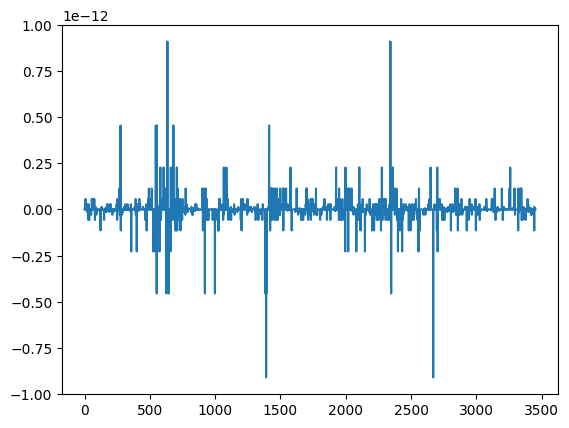

In [15]:
a = y.sum(axis=1) - n_exp.sum(axis=1)


In [4]:
metrics = lb.evaluate(model)

+-----------------------+---------+--------+--------+--------+--------+--------+---------+
| name                  | # param | NLL    | CEL    | KLD    | JSD %  | AIC    | BIC     |
+-----------------------+---------+--------+--------+--------+--------+--------+---------+
| DavidsonScaled        |     259 | 1.0098 | 1.0098 | 0.0332 | 0.9223 | 515.98 | 2108.20 |
+-----------------------+---------+--------+--------+--------+--------+--------+---------+


In [48]:
k = b.sum()
k

114.78433145882153

In [49]:
l = model.loss(return_jac=False, constraint=False) * model._count
l

1388415.1891511348

In [53]:
l / k

12095.85987482293

In [58]:
y.sum()

1374996

In [33]:
a = np.array([[0, 1, 2],
              [0, 2, 4],
              [0, 3, 6]])
i, j = np.where(a == 0)

In [34]:
a[i, j]

array([0, 0, 0])

In [1]:
max(1, 2)

2